# Phân tích dữ liệu Titanic

Link data set: [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

## 1.Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Bỏ qua lỗi

pd.set_option('float_format', '{:2f}'.format) # Hiển thị đầy đủ số thay vì 1e5


## 2.Import dữ liệu từ file csv


In [2]:
df = pd.read_csv('data\\titanic_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data\\titanic_train.csv'

In [ ]:
#Kiểm tra dữ liệu
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S


## 3.Tiền xử lý dữ liệu



### 3.1.Kiểm tra dữ liệu:

In [ ]:
# Kiểm tra dữ liệu null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

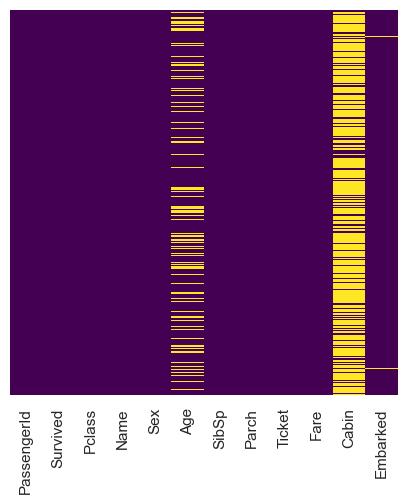

In [ ]:
# Plot heatmap để xem các trường null
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

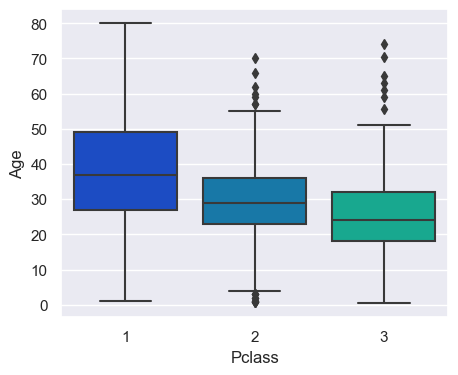

In [ ]:
# Plot boxplot để xem outliers
plt.figure(figsize=(5, 4))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
plt.show()

### 3.2.Xử lý dữ liệu để phân tích

In [ ]:
# Lấy tuổi trung vị của mỗi Pclass
median1 = df[df['Pclass'] == 1]['Age'].median()
median2 = df[df['Pclass'] == 2]['Age'].median()
median3 = df[df['Pclass'] == 3]['Age'].median()

median1, median2, median3


(37.0, 29.0, 24.0)

In [ ]:
# Fill các dữ liệu tuổi bị null
df.loc[(df['Pclass'] == 1) & (df['Age'].isna()), 'Age'] = median1
df.loc[(df['Pclass'] == 2) & (df['Age'].isna()), 'Age'] = median2
df.loc[(df['Pclass'] == 3) & (df['Age'].isna()), 'Age'] = median3


In [ ]:
#Kiểm tra null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Xóa cột Cabin vì có quá nhiều dữ liệu bị null sẽ ảnh hướng đến quá trình phân tích
df.drop(columns='Cabin', inplace=True)

In [ ]:
#Xóa 2 dòng có dữ liệu Embarked bị null
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)


In [ ]:
# Kiểm tra null
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [620]:
#Xem lại dữ liệu
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,S


## 4.Phân tích dữ liệu

#### 5.1.Xử lý dữ liệu để training model

In [622]:
# Set giới tính nam là 1 giới tính nữ là 0
df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.loc[df['Sex'] == 'female', 'Sex'] = 0


In [623]:
# Kiểm tra dữ liệu
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.050000,S


In [626]:
# Sử dụng get_dummies của thư viện pandas để transform dữ liệu embarked thành dạng binary code.
embark = pd.get_dummies(df['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [627]:
df2 = pd.concat([df, embark], axis=1)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.250000,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.283300,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.925000,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.100000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.050000,S,0,0,1


👉 Drop unnecessary columns: `PassengerId`, `Name`, `Ticket`, `Embarked`

In [628]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.250000,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.283300,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.925000,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.100000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.050000,S,0,0,1


In [629]:
# Drop unnecessary columns:
df2.drop(columns=['PassengerId','Embarked','Name','Ticket'], inplace=True)

In [630]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.250000,0,0,1
1,1,1,0,38.000000,1,0,71.283300,1,0,0
2,1,3,0,26.000000,0,0,7.925000,0,0,1
3,1,1,0,35.000000,1,0,53.100000,0,0,1
4,0,3,1,35.000000,0,0,8.050000,0,0,1


In [631]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


## Training model

<img src="https://www.saedsayad.com/images/LogReg_1.png" width="600">


+ Similar to linear regression, `logistic regression` is also used to` estimate the relationship between a dependent variable` and `one or more independent variables`, but it is used to make a prediction about a `categorical variable` versus a continuous one. A categorical variable can be true or false, yes or no, 1 or 0, et cetera. The unit of measure also differs from linear regression as `it produces a probability`, but the logit function transforms the S-curve into straight line.

+ As default, Sklearn Logistic Regression uses 0.5 as the threshold to classify 2 classes

In [632]:
from sklearn.model_selection import train_test_split

In [633]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='Survived'), 
                                                    df2['Survived'], 
                                                    test_size=0.2, 
                                                    random_state=101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((711, 9), (711,), (178, 9), (178,))

## Training and Predicting

In [634]:
from sklearn.linear_model import LogisticRegression

In [635]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
306,1,0,17.000000,1,0,108.900000,1,0,0
228,3,0,24.000000,3,1,25.466700,0,0,1
81,3,0,24.000000,0,0,7.787500,0,1,0
352,3,1,25.000000,1,0,17.800000,0,0,1
706,1,1,42.000000,0,0,26.287500,0,0,1
...,...,...,...,...,...,...,...,...,...
575,2,0,34.000000,0,0,13.000000,0,0,1
838,3,1,20.000000,0,0,7.925000,0,0,1
337,3,1,45.000000,0,0,8.050000,0,0,1
523,3,1,24.000000,0,0,7.229200,1,0,0


In [636]:
logreg1 = LogisticRegression()
logreg1.fit(X_train,y_train)

LogisticRegression()

In [637]:
# make prediction and return result as label:
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

# Make prediction and return result as probability:
y_train_pred_prop = logreg1.predict_proba(X_train)
y_test_pred_prop = logreg1.predict_proba(X_test)



In [638]:
# Let's take a look in our results:
print('Result of ".predict(X_train)":', y_train_pred[:5], sep = '\n')
print('=='*30)
print('Result of ".predict_proba(X_train)":', y_train_pred_prop[:5], sep = '\n')


Result of ".predict(X_train)":
[1 0 1 0 0]
Result of ".predict_proba(X_train)":
[[0.04829573 0.95170427]
 [0.60137417 0.39862583]
 [0.31986102 0.68013898]
 [0.91374281 0.08625719]
 [0.65455598 0.34544402]]


### How to change threshold?

In [537]:
y_train_pred_prop[:5]


array([[0.04957504, 0.95042496],
       [0.6176126 , 0.3823874 ],
       [0.31606758, 0.68393242],
       [0.92139741, 0.07860259],
       [0.65065468, 0.34934532]])

In [538]:
y_train_pred[:5]


array([1, 0, 1, 0, 0], dtype=int64)

In [539]:
# If you want to change threshold to 0.7:
(y_train_pred_prop>=0.7).astype('int')[:5]

array([[0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0]])

In [640]:
# Get prediction label with the new threshold 0.7.
# With assumtion that the passenger only be considered alive when 
# their alive's probability of  > 0.7, whereas the passenger is dead.
y_train_pred2 = (y_train_pred_prop>=0.7).astype('int')[:, 1]
y_train_pred2[:5]

array([1, 0, 0, 0, 0])

Let's move on to evaluate our model!

## Model Evaluation Metrics:

In [642]:
# Import evaluation metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 👉 Accuracy metrics
The ratio between the number of correctly predicted points and the total number of points in the data set. 

It's simple! Right :))

In [643]:
# Accuracy on trainset:
accuracy_score(y_train, y_train_pred)

0.8073136427566807

In [644]:
# Accuracy on testset:
accuracy_score(y_test, y_test_pred)

0.8146067415730337

### 👉 Confusion Matrix

In [645]:
# Calculating non-normalized confustion matrix on Testset:
confusion_matrix(y_test, y_test_pred)

array([[98,  9],
       [24, 47]], dtype=int64)

In [646]:
# Normalized confustion matrix on Testset
confusion_matrix(y_test, y_test_pred, normalize='true')


array([[0.91588785, 0.08411215],
       [0.33802817, 0.66197183]])

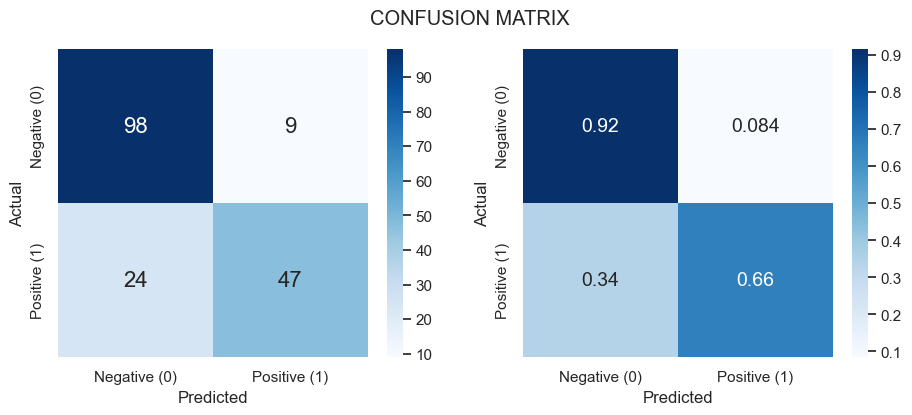

In [647]:
plt.figure(figsize = (11, 4))
plt.subplot(121)
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

plt.subplot(122)
conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})
plt.suptitle('CONFUSION MATRIX')
plt.show()

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



👉 **Type 1 and Type 2 errors**

![alt text](https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg)

source: https://www.statisticssolutions.com/to-err-is-human-what-are-type-i-and-ii-errors/

+ **Type 1 error** (False Positive), Xảy ra khi ta từ chối một giả thuyết trong khi thực tế giả thuyết đó là đúng.

    *+ Ví dụ:* Bạn xây dựng model để dự đoán bệnh nhân có bị covid hay không (Trong đó, positive là khỏe mạnh và negative là bị covid). 
    
    Nếu model dự đoán bệnh nhân không bị covid nhưng thực tế họ có bị thì đó được gọi là một Type 1 error

+ **Type 2 error** (False Negative), xảy ra khi ta chấp nhận một giả thuyết trong khi thực tế giả thuyết đó là sai.

    *+ Ví dụ:* Bạn xây dựng model để dự đoán bệnh nhân có bị covid hay không (Trong đó, positive là khỏe mạnh và negative là bị covid). 
    
    Nếu model dự đoán bệnh nhân bị covid nhưng thực tế họ lại không bị thì đó được gọi là một Type 2 error*

Thông thường chúng ta cần xem xét việc giảm cả 2 loại lỗi này để model của chúng ta đạt hiệu quả cao nhất


### Terminologies

**Recall, sensitivity, hit rate, or true positive rate(TPR)**: là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN). Hay nói cách khác là tỉ lệ model dự đoán đúng là Positive (1) trên tổng số thực tế Positive (1) của data

Để tăng Recall ta cần giảm FN, tức là giảm Type 2 error


$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN}
$$

**Precision or positive predictive value (PPV)**: là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive của model (TP + FP). Hay nói cách khác là tỉ lệ model dự đoán đúng là Positive (1) trên tổng số dự đoán là Positive (1) của model 

Để tăng Precision ta cần giảm FP, tức là giảm Type 1 error

$$
PPV = \frac{TP}{TP + FP}
$$


**F1 score**: the **harmonic mean** of **precision** and **recall**

$$
F_1 = 2 \frac{Precision . Recall}{Precision + Recall}
$$


We can check `precision`, `recall`, `f1-score` using `classification report`!

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



🤔 Note: If you curious about `macro avg` and `weight avg` and here is the answer:


+ In the case of **Weighted average** the performance metrics are weighted accordingly:

In [709]:
# Example Weight Avg. of recall (The same with Precision):
# (Percentage_of_positive)*Positive_Recall + (Percentage_of_Negative)*Negative_Recall

(71/178)*0.66 + (107/178)*0.92

0.8162921348314607

+ In the case of **Macro average** is just the **mean** of metrics of classes:

In [710]:
# Example Macro Avg. of recall (The same with Precision):
# (Positive_Recall + Negative_Recall)/2

(0.66 + 0.92)/2

0.79

## 🤔 Let's try to train model without `Parch` column and Use SMOTE OverSampling technique 

👉 Drop Parch column:

In [676]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.250000,0,0,1
1,1,1,0,38.000000,1,0,71.283300,1,0,0
2,1,3,0,26.000000,0,0,7.925000,0,0,1
3,1,1,0,35.000000,1,0,53.100000,0,0,1
4,0,3,1,35.000000,0,0,8.050000,0,0,1


In [677]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [678]:
df3 = df2.drop(columns = 'Parch')
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,C,Q,S
0,0,3,1,22.000000,1,7.250000,0,0,1
1,1,1,0,38.000000,1,71.283300,1,0,0
2,1,3,0,26.000000,0,7.925000,0,0,1
3,1,1,0,35.000000,1,53.100000,0,0,1
4,0,3,1,35.000000,0,8.050000,0,0,1


👉 Use SMOTE OVERSAMPLING technique

<img src="https://www.researchgate.net/publication/347937180/figure/fig3/AS:973429209563136@1609095017080/Illustration-of-the-SMOTE-oversampling-approach.ppm" width="600">

In [679]:
X = df3.drop(columns='Survived')
y = df3['Survived']

In [680]:
X.shape, y.shape

((889, 8), (889,))

In [698]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [692]:
# Install imblearn library
! pip install imblearn

In [733]:
from imblearn.over_sampling import SMOTE

# X và y là các feature và label của dữ liệu
smote = SMOTE(k_neighbors = 3, random_state=96)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [734]:
X_resampled.shape, y_resampled.shape

((1098, 8), (1098,))

In [735]:
# Check value count of label:
y_resampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [736]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=101,
                                                    stratify = y_resampled)

X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((878, 8), (878,), (220, 8), (220,))

In [737]:
# Load model:
logreg2 = LogisticRegression()
# Train model:
logreg2.fit(X_train1, y_train1)

LogisticRegression()

In [738]:
# Prediction on trainset and testset:
y_test_pred1 = logreg2.predict(X_test1)


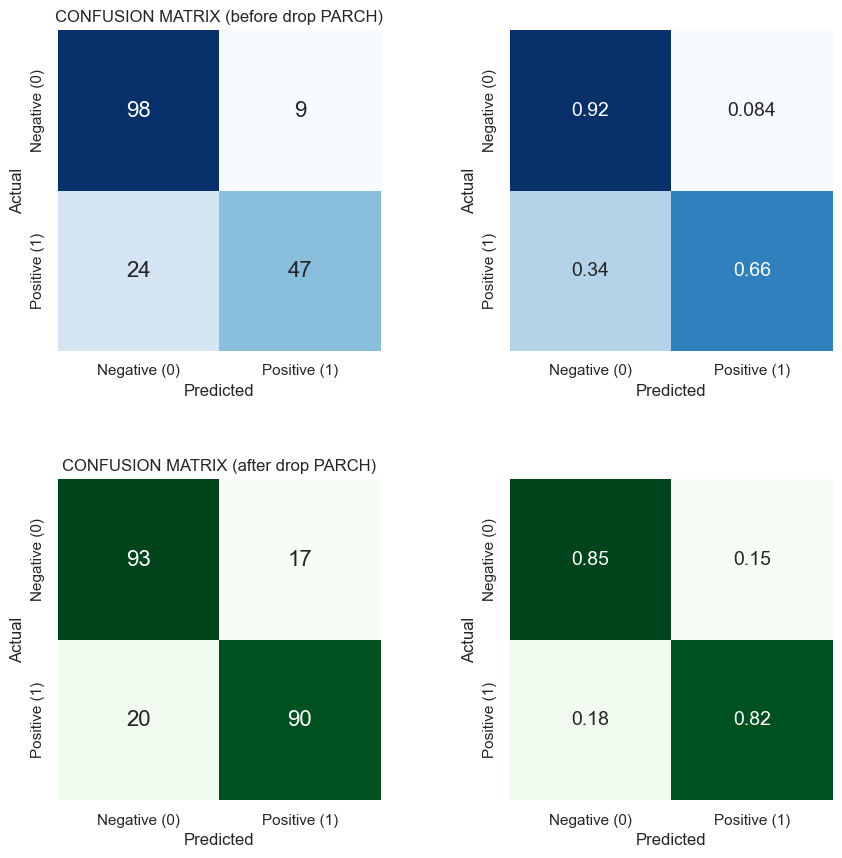

In [739]:
plt.figure(figsize = (10, 10))
# Plot before drop parch col:
plt.subplot(221)
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar = False)
plt.title('CONFUSION MATRIX (before drop PARCH)')

plt.subplot(222)
conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, cbar = False)

# Plot after drop parch cols:
plt.subplot(223)
conf_matrix = confusion_matrix(y_test1, y_test_pred1)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16}, cbar = False)
plt.title('CONFUSION MATRIX (after drop PARCH)')

plt.subplot(224)
conf_matrix_norm = confusion_matrix(y_test1, y_test_pred1, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 14}, cbar = False)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [740]:
print('Classification after drop "Parch" and Over sampling')
print(classification_report(y_test1,y_test_pred1))


Classification after drop "Parch" and Over sampling
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.84      0.82      0.83       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



In [741]:
print('Classification before drop "Parch" and Over sampling')
print(classification_report(y_test,y_test_pred))


Classification before drop "Parch" and Over sampling
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



😉 `Phần đọc thêm:`

Tâm có thể nói việc xây dựng và cải thiện model machine learning là một nghệ thuật của việc sáng tạo và học hỏi không ngừng. Thật thú vị là sẽ không có 1 đáp án chung cho mọi bài toán là **"Làm như thế nào để tạo ra một model "hoàn hảo"?"**, vì mỗi data, model sẽ có 1 đặc trưng riêng biệt và nó là một quá trình của việc nghiên cứu từ những paper, của việc thử và đánh giá, của việc học hỏi những người đi trước có bài toán tương tự và áp dụng cho bài toán của bạn.

Ở đây Tâm có một vài keywords cho các bạn tìm hiểu thêm để cải thiện việc modeling của mình nhé: **StandardScaler**, **RobustScaler**, **Undersampling**, **Cost-sensitive learning**, **Cross validation**, **ROC**, **Sklearnt Pipeline**...

+ Option 2 to plot Confusion matrix:

In [744]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

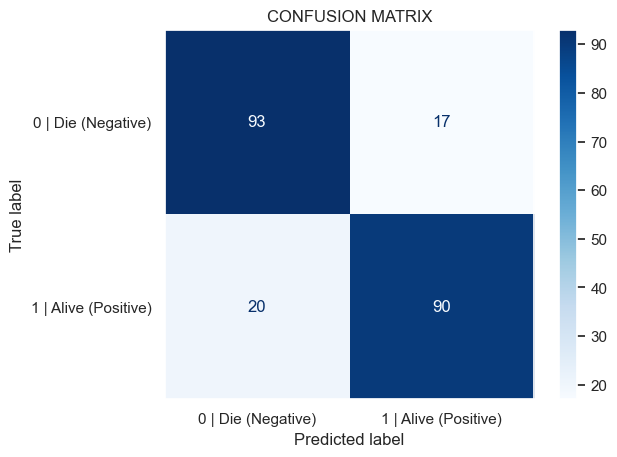

In [745]:
# Plot non-normalized confusion matrix
conf_matrix = confusion_matrix(y_test1, y_test_pred1)
cfdisplay = ConfusionMatrixDisplay(conf_matrix, display_labels=['0 | Die (Negative)','1 | Alive (Positive)'],)
cfdisplay.plot(cmap = 'Blues',)
plt.grid(False)
plt.title('CONFUSION MATRIX')
plt.show()

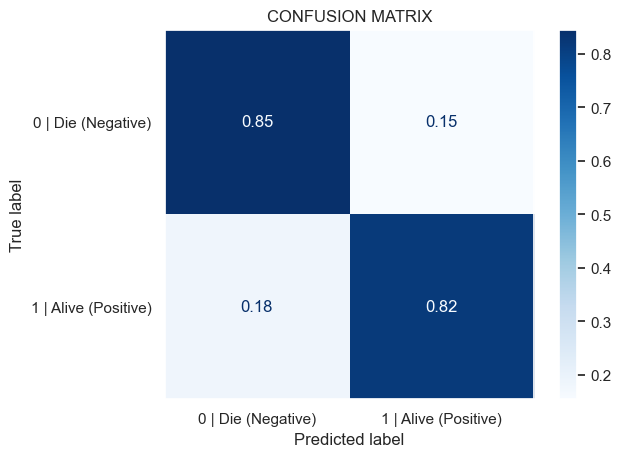

In [746]:
# Plot non-normalized confusion matrix
conf_matrix = confusion_matrix(y_test1, y_test_pred1, normalize='true')
cfdisplay = ConfusionMatrixDisplay(conf_matrix, display_labels=['0 | Die (Negative)','1 | Alive (Positive)'],)
cfdisplay.plot(cmap = 'Blues',)
plt.grid(False)
plt.title('CONFUSION MATRIX')
plt.show()